In [80]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import monsoon_plot as pf

In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
path = '/Users/johannemehren/filer/'

#ds= xr.open_dataset(path + 'era5_latlon_2006-2018_3030.nc')
ds_regrid = xr.open_dataset(path + 'gridfile_test.nc')

#ds1 = xr.open_dataset(path + 'erai_latlon_regrid_2006-2018_3030.nc')
ds1_regrid = xr.open_dataset(path + 'erai_regrid_5x5.nc')
erai_res = ds1_regrid.sel(time=slice('2007-01-01', '2018-12-31'))

obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')
obs_res = obs.resample(time='M').mean()

In [93]:
era5_mean = ds_regrid.mean(dim='time', keep_attrs=True)
erai_mean = erai_res.mean(dim='time', keep_attrs = True)

In [83]:
erai_m = erai_res.groupby('time.season').mean()
era5_m = ds_regrid.groupby('time.season').mean()
obs_m = obs_res.groupby('time.season').mean()

/Users/johannemehren/opt/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [84]:
diff_era5_gpsro_jja_cpt = era5_m.ctpt[1,:,:] - obs_m.CP_T[1,:,:]
diff_erai_gpsro_jja_cpt = erai_m.ctpt[1,:,:] - obs_m.CP_T[1,:,:]

diff_era5_gpsro_jja_lrt = era5_m.tpt[1,:,:] - obs_m.LR_T[1,:,:]
diff_erai_gpsro_jja_lrt = erai_m.tpt[1,:,:] - obs_m.LR_T[1,:,:]

In [85]:
    ds1 = diff_era5_gpsro_jja_cpt
    ds2 = diff_erai_gpsro_jja_cpt
    ds3 = diff_era5_gpsro_jja_lrt
    ds4 = diff_erai_gpsro_jja_lrt
    
    tl1 = 'ERA5 CPT'
    tl2 = 'ERA-I CPT'
    
    label = 'Temperature[K]'
    
    vmin1 = -1.2
    vmax1 = 1.2
    
    vmin2 = -2.3
    vmax2 = 2.3

    
    

In [86]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


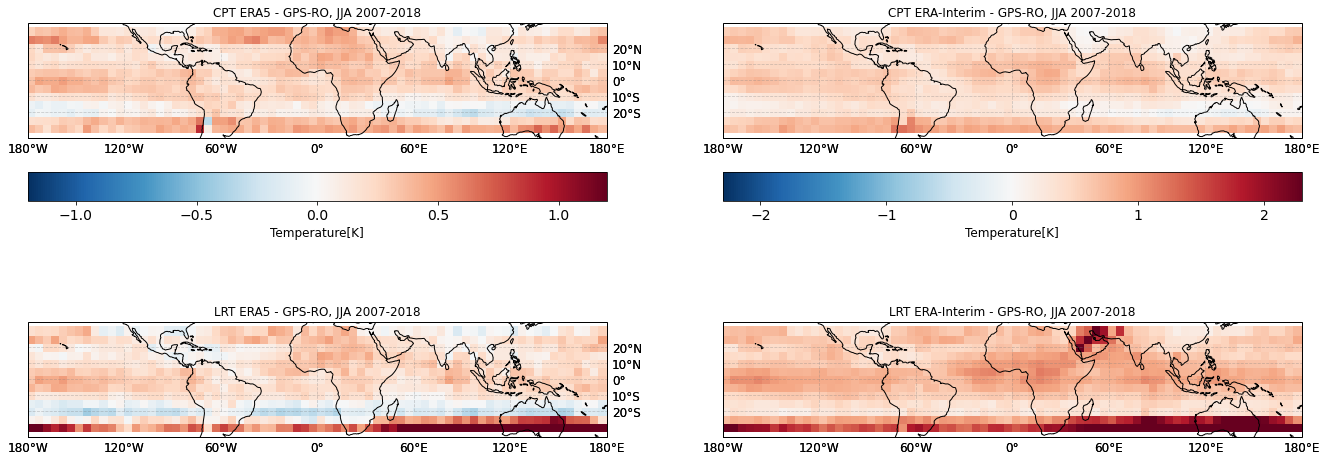

In [87]:
    proj = ccrs.PlateCarree(central_longitude = 0)
    f, axs= plt.subplots(2, 2, figsize=(18, 8),
                                           subplot_kw={'projection':proj})
    xticks = [-180,-120, -60, 0, 60, 120, 180]
    yticks = [-20, -10, 0, 10, 20]
    cm = 'RdBu_r'
    font_size = 14

    #ax1 plot
    im1 = ds1.plot.pcolormesh(ax=axs[0,0], cmap=cm, vmin=vmin1, vmax=vmax1, transform=ccrs.PlateCarree(central_longitude=0),add_colorbar=False)
    
    cb1 = plt.colorbar(im1,ax=axs[0,0], orientation="horizontal")
    cb1.set_label(label=label, size='large')
    font_size = 14 # Adjust as appropriate.
    cb1.ax.tick_params(labelsize=font_size)
    
    
    im2 = ds2.plot.pcolormesh(ax=axs[0,1], cmap=cm, vmin = vmin2, vmax=vmax2,
                              transform=ccrs.PlateCarree(central_longitude=0),add_colorbar=False)
    cb2 = plt.colorbar(im2, ax=axs[0,1], orientation="horizontal")
    cb2.set_label(label=label, size='large')
    font_size = 14 # Adjust as appropriate.
    cb2.ax.tick_params(labelsize=font_size)
    
    ds3.plot(ax=axs[1,0], cmap=cm, vmin = vmin1, vmax=vmax1,
                              transform=ccrs.PlateCarree(central_longitude=0), add_colorbar=False)
    
    ## ax4 
    
    ds4.plot(ax=axs[1,1], cmap=cm, vmin = vmin2, vmax=vmax2,
                              transform=ccrs.PlateCarree(central_longitude=0), add_colorbar=False)
    
    
    for i in range(0,2):
        for j in range(0,2):
            axs[i,j].coastlines()
            gl  = axs[i,0].gridlines(xlocs=xticks, ylocs=yticks, draw_labels= True, alpha = 0.2, color = 'gray', linestyle = '--')
            gl.xlabels_top = False
            gl.ylabels_left = False
            gl.xlabel_style = {'size': 12}
            gl.ylabel_style = {'size': 12}
            gl.xformatter = LONGITUDE_FORMATTER
            gl.yformatter = LATITUDE_FORMATTER
            
            gl2  = axs[i,1].gridlines(xlocs=xticks, ylocs=yticks,draw_labels= True, alpha = 0.2, color = 'gray', linestyle = '--')
            gl2.xlabels_top = False
            gl2.ylabels_left = False
            gl2.ylabels_right = False
            gl2.xlabel_style = {'size': 12}
            gl2.ylabel_style = {'size': 12}
            gl2.xformatter = LONGITUDE_FORMATTER
            gl2.yformatter = LATITUDE_FORMATTER
            
            
            
    axs[0,0].set_title('CPT ERA5 - GPS-RO, JJA 2007-2018')
    axs[0,1].set_title('CPT ERA-Interim - GPS-RO, JJA 2007-2018')
    axs[1,0].set_title('LRT ERA5 - GPS-RO, JJA 2007-2018')
    axs[1,1].set_title('LRT ERA-Interim - GPS-RO, JJA 2007-2018')
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2)
    
    #f.savefig('test_4plot.png')

### Slice Area for better analysis

In [72]:
obs_mean = obs_res.mean(dim='time', keep_attrs=True)

In [88]:
era5_monsoon = era5_m.sel(lat=slice(-10,30), lon=slice(30,125))
erai_monsoon = erai_m.sel(lat=slice(-10,30), lon=slice(30,125))
obs_monsoon = obs_m.sel(lat=slice(-10,30), lon=slice(30,125))
obs_mean_monsoon = obs_mean.sel(lat=slice(-10,30), lon=slice(30,125))

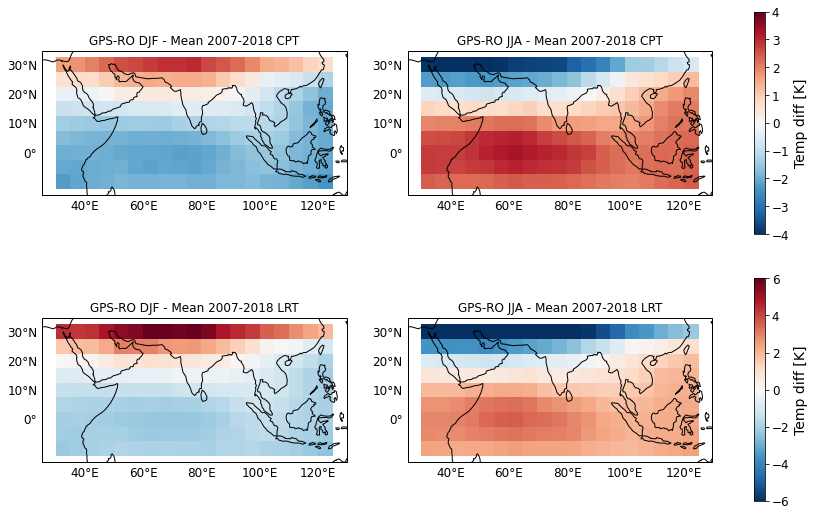

In [107]:
k = pf.fourplot_two_cb(obs_monsoon.CP_T[0,:,:] - obs_mean_monsoon.CP_T.values,
                       obs_monsoon.CP_T[1,:,:] - obs_mean_monsoon.CP_T.values,
                       obs_monsoon.LR_T[0,:,:] - obs_mean_monsoon.LR_T.values, 
                       obs_monsoon.LR_T[1,:,:] - obs_mean_monsoon.LR_T.values,
                        'GPS-RO DJF - Mean 2007-2018 CPT', 'GPS-RO JJA - Mean 2007-2018 CPT', 
                       'GPS-RO DJF - Mean 2007-2018 LRT','GPS-RO JJA - Mean 2007-2018 LRT',
                       vmin1 = -4, vmax1 = 4, vmin2 = -6, vmax2 = 6, label='Temp diff [K]')
#k.savefig('figs/gpsro_absval_djf-jja-mean_2007-2018_lrt-cpt.png')

In [89]:
ds1 = era5_monsoon.tpt[1,:,:]
ds2 = erai_monsoon.tpt[1,:,:]
ds3 = era5_monsoon.ctpt[1,:,:]
ds4 = erai_monsoon.ctpt[1,:,:]

ds5 = era5_monsoon.tpt[1,:,:] - obs_monsoon.LR_T[1,:,:]
ds6 = erai_monsoon.tpt[1,:,:] - obs_monsoon.LR_T[1,:,:]
ds7 = era5_monsoon.ctpt[1,:,:] - obs_monsoon.CP_T[1,:,:]
ds8 = erai_monsoon.ctpt[1,:,:] - obs_monsoon.CP_T[1,:,:]

vmin1 = 188
vmax1 = 198

vmin2 = -1.8
vmax2 = 1.8

vmin3 = -0.5
vmax3 = 0.5

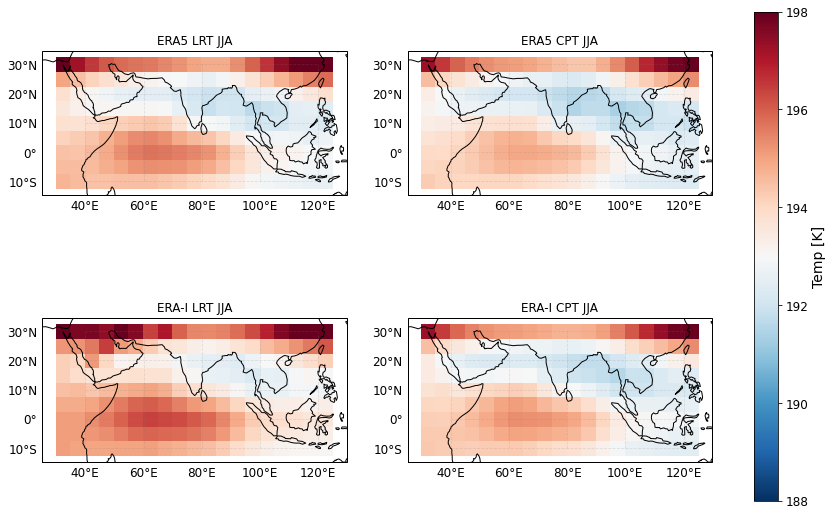

In [90]:
    proj = ccrs.PlateCarree(central_longitude = 0)
    f, axs = plt.subplots(2, 2, figsize=(15, 9),
                                           subplot_kw={'projection':proj})
    xticks = [40, 60, 80, 100, 120]
    yticks = [-10,0, 10, 20, 30]
    cm = 'RdBu_r'
    font_size = 14

    #ax1 plot
    im1 = ds1.plot.pcolormesh(ax=axs[0,0], cmap=cm, vmin=vmin1, vmax=vmax1, transform=ccrs.PlateCarree(central_longitude=0),
            add_colorbar=False)
    cb1 = plt.colorbar(im1,ax=axs[:,:]) #, orientation="horizontal")
    cb1.set_label(label='Temp [K]', fontsize=14)
    font_size = 12 # Adjust as appropriate.
    cb1.ax.tick_params(labelsize=font_size)
    
    axs[0,0].set_title('ERA5 LRT JJA')
    
    # ax2 plot
    ds2.plot(ax=axs[1,0], cmap=cm, vmin=vmin1, vmax=vmax1, transform=ccrs.PlateCarree(central_longitude=0),
            add_colorbar=False)
    axs[1,0].set_title('ERA-I LRT JJA')
    #cb2 = plt.colorbar(im2, ax=axs[1,:])
    #cb2.set_label(label='Temp [K]', size='large')
    #font_size = 14 # Adjust as appropriate.
    #cb2.ax.tick_params(labelsize=font_size)
    
    
    # ax3 plot
    ds3.plot(ax=axs[0,1], cmap=cm, vmin=vmin1, vmax=vmax1, transform=ccrs.PlateCarree(central_longitude=0),
            add_colorbar=False)
    axs[0,1].set_title('ERA5 CPT JJA')
    
    #ax4 plot
    ds4.plot(ax=axs[1,1], cmap=cm, vmin=vmin1, vmax=vmax1, transform=ccrs.PlateCarree(central_longitude=0), 
            add_colorbar=False)
    axs[1,1].set_title('ERA-I CPT JJA')
    
    

        
    for i in range(0,2):
        for j in range(0,2):
            axs[i,j].coastlines()
            gl  = axs[i,j].gridlines(xlocs=xticks, ylocs=yticks, draw_labels= True, alpha = 0.2, color = 'gray', linestyle = '--')
            gl.xlabels_top = False
            gl.ylabels_right = False
            gl.xlabel_style = {'size': 12}
            gl.ylabel_style = {'size': 12}
            gl.xformatter = LONGITUDE_FORMATTER
            gl.yformatter = LATITUDE_FORMATTER
            
    #plt.tight_layout()       
    #plt.subplots_adjust(wspace=0.2)
    
    #f.savefig('era5_erai_lrt_cpt_JJA_2007-2018.pdf')      

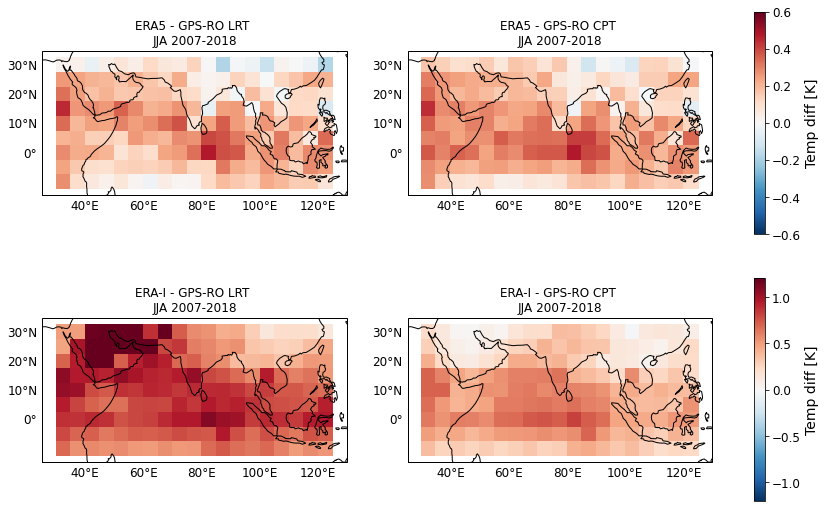

In [110]:
tl1 = 'ERA5 - GPS-RO LRT \nJJA 2007-2018'
tl3 = 'ERA-I - GPS-RO LRT \nJJA 2007-2018'

tl2 = 'ERA5 - GPS-RO CPT \nJJA 2007-2018'
tl4 = 'ERA-I - GPS-RO CPT \nJJA 2007-2018'

vmin1 = -0.6
vmax1 = 0.6
vmin2 = -1.2
vmax2 = 1.2
label = 'Temp diff [K]'

r = pf.fourplot_two_cb(ds5, ds7, ds6, ds8,
                    tl1, tl2, tl3, tl4,
                    vmin1, vmax1, vmin2, vmax2, label)
#r.savefig('figs/diff_era5-erai-gpsro_jja-2007-2018_cpt-lrt.png')

In [94]:
era5_mean_monsoon = era5_mean.sel(lat=slice(-10,30), lon=slice(30,125))
erai_mean_monsoon = erai_mean.sel(lat=slice(-10,30), lon=slice(30,125))
obs_mean_monsoon = obs_mean.sel(lat=slice(-10,30), lon=slice(30,125))

In [95]:
diff_mean_era5_cpt = era5_mean_monsoon.ctpt - obs_mean_monsoon.CP_T.values
diff_mean_era5_lrt = era5_mean_monsoon.tpt - obs_mean_monsoon.LR_T.values
diff_mean_erai_cpt = erai_mean_monsoon.ctpt - obs_mean_monsoon.CP_T.values
diff_mean_erai_lrt = erai_mean_monsoon.tpt - obs_mean_monsoon.LR_T.values

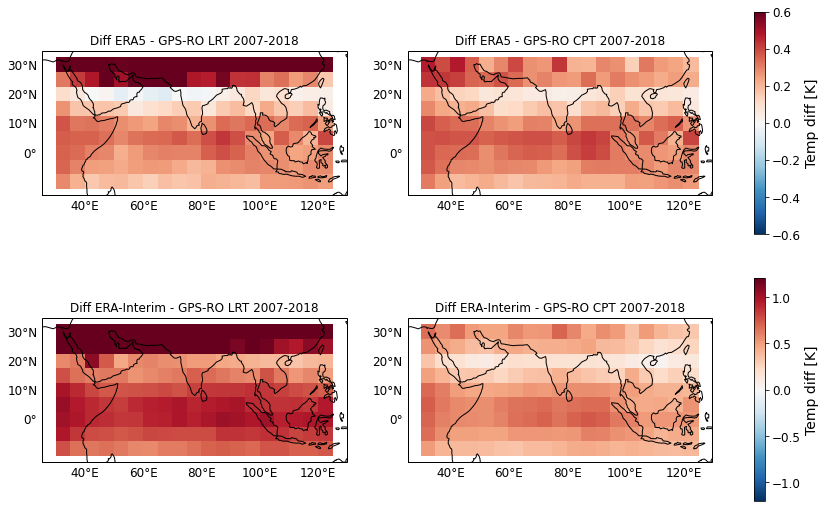

In [112]:
v = pf.fourplot_two_cb(diff_mean_era5_lrt,diff_mean_era5_cpt, diff_mean_erai_lrt,diff_mean_erai_cpt,
                       'Diff ERA5 - GPS-RO LRT 2007-2018', 'Diff ERA5 - GPS-RO CPT 2007-2018', 
                       'Diff ERA-Interim - GPS-RO LRT 2007-2018', 'Diff ERA-Interim - GPS-RO CPT 2007-2018',
                       -0.6, 0.6, -1.2,  1.2, label = 'Temp diff [K]')
#r.savefig('figs/diff_era5-erai-gpsro_mean-2007-2018_cpt-lrt.png')

## Compare reanalysis

In [114]:
ds = xr.open_dataset(path + 'FULL-ERA5.monthmean.2007-2018.concat_new.nc')
ds2 = xr.open_dataset(path + 'erai.tp.monmean.gridera.nc')

In [141]:
ds2_t = ds2.sel(time=slice('2007-01-01', '2018-12-31'))

era5_r = ds.sel(lat=slice(-10,50), lon=slice(40,120))
erai_r = ds2_t.sel(lat=slice(-10,50), lon=slice(40,120))

era5_r_monsoon = era5_r.groupby('time.season').mean()
erai_r_monsoon = erai_r.groupby('time.season').mean()


In [116]:
era5_mean = era5_r.mean(dim='time', keep_attrs=True)

In [117]:
lrt_diff = era5_r_monsoon.tpt[1,:,:] - erai_r_monsoon.tpt[1,:,:]
cpt_diff = era5_r_monsoon.ctpt[1,:,:] - erai_r_monsoon.ctpt[1,:,:]

lrt_diff_p = era5_r_monsoon.tpp[1,:,:] - erai_r_monsoon.tpp[1,:,:]
cpt_diff_p = era5_r_monsoon.ctpp[1,:,:] - erai_r_monsoon.ctpp[1,:,:]

In [ ]:
fourplot_four_cb(ds1, ds2, ds3, ds4,
                        tl1, tl2, tl3, tl4,
                        vmin1,vmax1, vmin2, vmax2,
                        vmin3, vmax3, vmin4, vmax4):


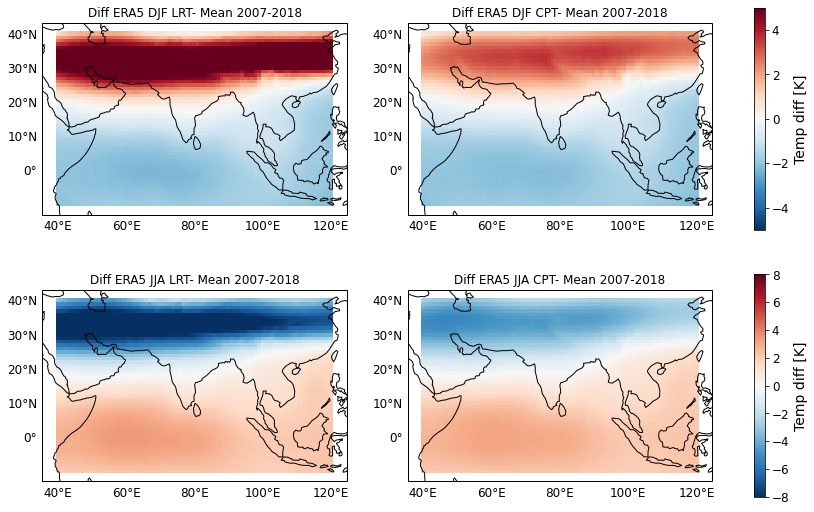

In [130]:
vmin1= -5
vmax1 = 5

vmin3 = -8
vmax3 = 8

diff2 = era5_r_monsoon.ctpt[0,:,:] - era5_mean.ctpt.values
diff4 = era5_r_monsoon.ctpt[1,:,:] - era5_mean.ctpt.values

diff1 = era5_r_monsoon.tpt[0,:,:] - era5_mean.tpt.values
diff3 = era5_r_monsoon.tpt[1,:,:]- era5_mean.tpt.values

tl1 = 'Diff ERA5 DJF LRT- Mean 2007-2018'
tl2 = 'Diff ERA5 DJF CPT- Mean 2007-2018'
tl3 = 'Diff ERA5 JJA LRT- Mean 2007-2018'
tl4 = 'Diff ERA5 JJA CPT- Mean 2007-2018'

a = pf.fourplot_two_cb(diff1, diff2, diff3, diff4,
                      tl1,tl2,tl3,tl4,
                      vmin1,vmax1, vmin3, vmax3, label = 'Temp diff [K]')

#a.savefig('figs/era5_abs_monsoon_djf-jja_lrt-cpt.png')
                       

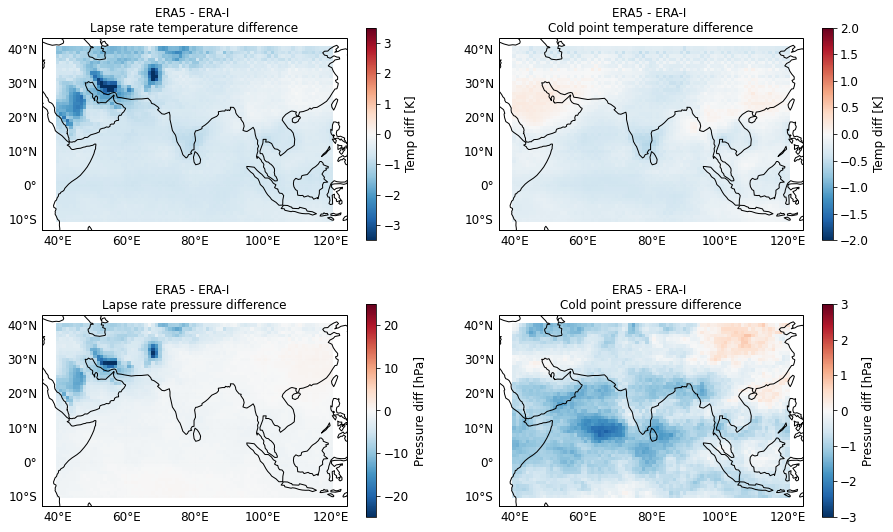

In [148]:
tl1 = 'ERA5 - ERA-I \nLapse rate temperature difference'
tl2 = 'ERA5 - ERA-I \nCold point temperature difference'
tl3 = 'ERA5 - ERA-I \nLapse rate pressure difference'
tl4 = 'ERA5 - ERA-I \nCold point pressure difference'

h = pf.fourplot_four_cb(lrt_diff, cpt_diff,lrt_diff_p, cpt_diff_p,
                      tl1 = tl1,tl2 = tl2, tl3 = tl3,  tl4 = tl4,
                      vmin1=-3.5, vmax1 = 3.5, vmin2 = -2, vmax2 = 2, 
                      vmin3 = -25, vmax3 = 25, vmin4 = -3, vmax4 = 3)
#h.savefig('rean_diff_jja_temp_pres.png')

In [137]:
lrt_diff_c = era5_monsoon.tpt[1,:,:] - erai_monsoon.tpt[1,:,:]
cpt_diff_c = era5_monsoon.ctpt[1,:,:] - erai_monsoon.ctpt[1,:,:]

lrt_diff_p_c = era5_monsoon.tpp[1,:,:] - erai_monsoon.tpp[1,:,:]
cpt_diff_p_c = era5_monsoon.ctpp[1,:,:] - erai_monsoon.ctpp[1,:,:]

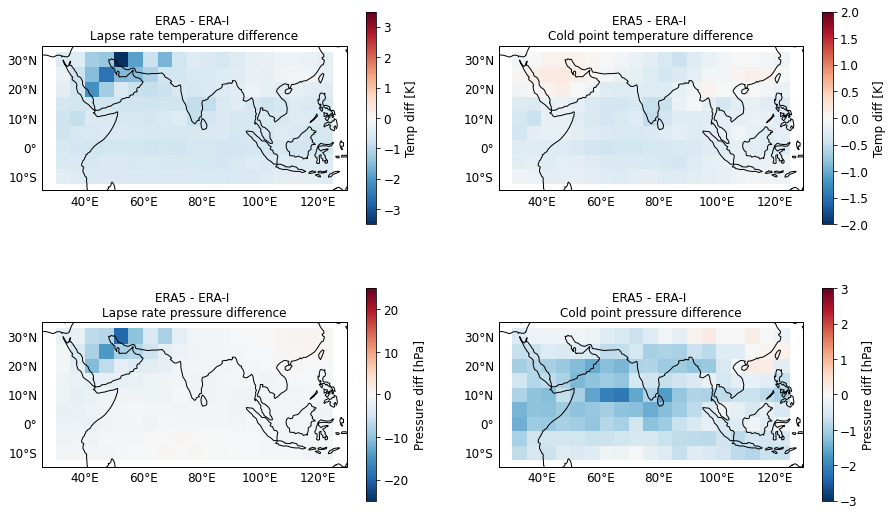

In [149]:
tl1 = 'ERA5 - ERA-I \nLapse rate temperature difference'
tl2 = 'ERA5 - ERA-I \nCold point temperature difference'
tl3 = 'ERA5 - ERA-I \nLapse rate pressure difference'
tl4 = 'ERA5 - ERA-I \nCold point pressure difference'

h = pf.fourplot_four_cb(lrt_diff_c, cpt_diff_c,lrt_diff_p_c, cpt_diff_p_c,
                      tl1 = tl1,tl2 = tl2, tl3 = tl3,  tl4 = tl4,
                      vmin1=-3.5, vmax1 = 3.5, vmin2 = -2, vmax2 = 2, 
                      vmin3 = -25, vmax3 = 25, vmin4 = -3, vmax4 = 3)
#h.savefig('rean_diff_coarse_jja_temp_pres.png')